In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error , confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('carsales.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 223.7+ KB


In [29]:
ohe = OrdinalEncoder()
df['name'] = ohe.fit_transform(df[['name']])
df['fuel'] = ohe.fit_transform(df[['fuel']])
df['seller_type'] = ohe.fit_transform(df[['seller_type']])
df['transmission'] = ohe.fit_transform(df[['transmission']])
df['owner'] = ohe.fit_transform(df[['owner']])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775.0,2007,60000,70000,4.0,1.0,1.0,0.0
1,1041.0,2007,135000,50000,4.0,1.0,1.0,0.0
2,505.0,2012,600000,100000,1.0,1.0,1.0,0.0
3,118.0,2017,250000,46000,4.0,1.0,1.0,0.0
4,279.0,2014,450000,141000,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
3572,602.0,2014,409999,80000,1.0,1.0,1.0,2.0
3573,601.0,2014,409999,80000,1.0,1.0,1.0,2.0
3574,777.0,2009,110000,83000,4.0,1.0,1.0,2.0
3575,381.0,2016,865000,90000,1.0,1.0,1.0,0.0


<Axes: >

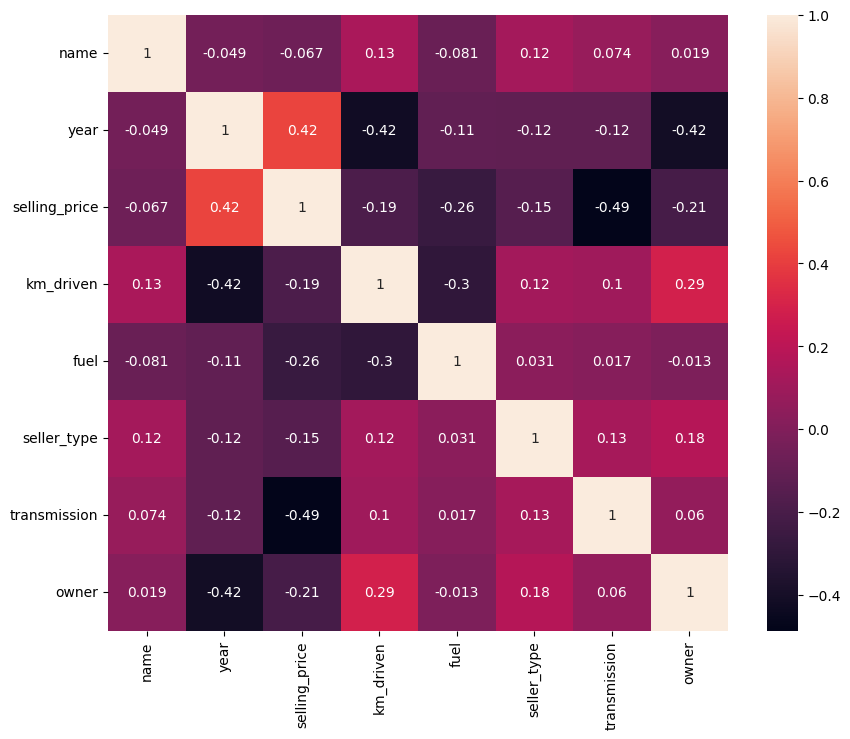

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='year', ylabel='km_driven'>

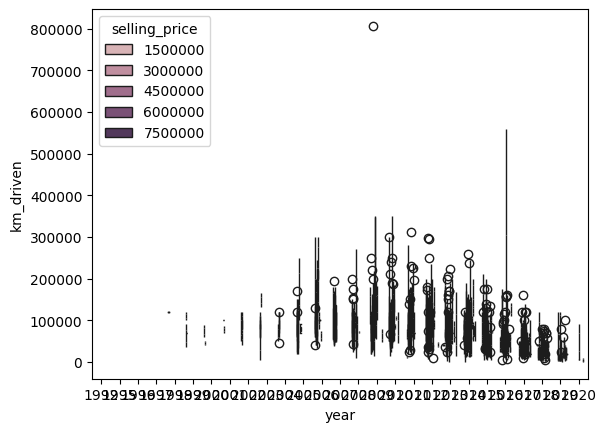

In [ ]:
sns.boxplot(x='year', y='km_driven', hue='selling_price', data=df)

In [36]:
X = df.drop(['selling_price', 'fuel', 'transmission'], axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.2, random_state=42)
X

,name,year,km_driven,seller_type,owner
0,775.0,2007,70000,1.0,0.0
1,1041.0,2007,50000,1.0,0.0
2,505.0,2012,100000,1.0,0.0
3,118.0,2017,46000,1.0,0.0
4,279.0,2014,141000,1.0,2.0
...,...,...,...,...,...
3572,602.0,2014,80000,1.0,2.0
3573,601.0,2014,80000,1.0,2.0
3574,777.0,2009,83000,1.0,2.0
3575,381.0,2016,90000,1.0,0.0


In [37]:
ohe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encode = ohe.fit_transform(X_train)
X_test_encode = ohe.transform(X_test)
X_train_encode

array([[1.236e+03, 2.000e+01, 5.650e+02, 0.000e+00, 0.000e+00],
       [9.400e+01, 2.300e+01, 1.050e+02, 1.000e+00, 2.000e+00],
       [3.700e+02, 1.300e+01, 3.320e+02, 1.000e+00, 1.000e+00],
       ...,
       [8.620e+02, 2.400e+01, 2.750e+02, 1.000e+00, 0.000e+00],
       [8.560e+02, 2.300e+01, 1.890e+02, 1.000e+00, 0.000e+00],
       [3.190e+02, 1.800e+01, 3.780e+02, 0.000e+00, 2.000e+00]],
      shape=(2861, 5))

In [38]:
st = StandardScaler()
X_train_scaled = st.fit_transform(X_train_encode)
X_test_scaled = st.transform(X_test_encode)
X_train_scaled

array([[ 1.63636906,  0.24596273,  1.3277822 , -1.93271579, -0.70807026],
       [-1.62201219,  0.95581414, -1.38063089,  0.47141459,  0.85805964],
       [-0.8345225 , -1.41035724, -0.04408791,  0.47141459,  0.07499469],
       ...,
       [ 0.56926347,  1.19243128, -0.37969562,  0.47141459, -0.70807026],
       [ 0.55214413,  0.95581414, -0.88605111,  0.47141459, -0.70807026],
       [-0.9800369 , -0.22727155,  0.2267534 , -1.93271579,  0.85805964]],
      shape=(2861, 5))

In [39]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred = model.predict(X_test_scaled)


In [41]:
mse = mean_squared_error(y_test, y_pred)
mse

259761288648.99667

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y_test, y_pred)
#mean_absolute_error(y_test, y_pred)

0.19362188043649908

In [47]:
from sklearn.ensemble import RandomForestRegressor

mod = RandomForestRegressor(n_estimators=500, max_depth=5)

mod.fit(X_train_scaled, y_train)

y_pred = mod.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y_test, y_pred)

-3.279203914567879

In [50]:
from sklearn.svm import SVR

mode = SVR(kernel='linear',gamma='auto', C=10)

mode.fit(X_train_scaled, y_train)

y_pred = mode.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y_test, y_pred)



-0.01824213916434636

In [51]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best R2 Score:", grid.best_score_)


Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best R2 Score: 0.6890974521636963


In [54]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=300)
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

r2_score(y_test, y_pred)

-3.8104348182678223